# 6.5 Supervised machine learning - Task

### a) Import Libraries
### b) Import data and conduct necessary cleaning, manipulation, reprocessing
### c) apply elbow technique
- descide how many clusters to use in k-means algorithm based on the result

### d) running k-means algorithm
### e) attach new column (variable) to df, showing the result of clustering 
### f) Visualizations

- comments on the outcome

### g) descriptive statistics

### a) import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
%matplotlib inline

### b) Import data and conduct necessary cleaning, manipulation, reprocessing

In [3]:
# set path
path = r'C:\Users\rieke\Data Analytics\Achievement 6\02 Data'

In [4]:
path

'C:\\Users\\rieke\\Data Analytics\\Achievement 6\\02 Data'

In [5]:
df = pd.read_excel(os.path.join(path, '02 Prepared Data', 'without totals_WW 2010 - 2022.xlsx'), index_col = False)

In [6]:
df.head()

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728,1,16471.891,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469,2,4940.909,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216,3,908.238,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083,4,0.996,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Coal,14796.776,8,163887.775,NaN,0.713468


In [7]:
df.shape

(112162, 12)

the k-means algorithm can only handle numerical variables, so we’ll need to remove any categorical columns from your data.

perform grouping & aggregation to be able to apply k-means algorithm

In [8]:
df_new = df.groupby('COUNTRY').agg({'PRODUCT':'count', 'VALUE':'mean'})\
.rename(columns={'PRODUCT':'count_of_sources','VALUE':'mean_value'})\
.reset_index()
print (df_new)

                COUNTRY  count_of_sources    mean_value
0             Argentina              1714   2664.312569
1             Australia              2522   5089.664728
2               Austria              2748   1278.388002
3               Belgium              2748   1600.721058
4                Brazil              1788  10999.550380
5              Bulgaria              1680    809.180049
6                Canada              2832  11627.716714
7                 Chile              2470   1607.140784
8              Colombia              1750   1612.615263
9            Costa Rica               312    331.536414
10              Croatia              1591    260.058881
11               Cyprus              1440    129.117284
12       Czech Republic              2748   1509.550959
13              Denmark              2532    666.526733
14              Estonia              2424    208.608591
15              Finland              2748   1349.807701
16               France              2952   9534

In [9]:
# deleting geographical region summaries to exclude outliers and see the single countries only
list1 = ['IEA Total', 'OECD Americas', 'OECD Asia Oceania', 'OECD Europe', 'OECD Total']

In [10]:
print(df_new[df_new.COUNTRY.isin(list1) == False])

                COUNTRY  count_of_sources    mean_value
0             Argentina              1714   2664.312569
1             Australia              2522   5089.664728
2               Austria              2748   1278.388002
3               Belgium              2748   1600.721058
4                Brazil              1788  10999.550380
5              Bulgaria              1680    809.180049
6                Canada              2832  11627.716714
7                 Chile              2470   1607.140784
8              Colombia              1750   1612.615263
9            Costa Rica               312    331.536414
10              Croatia              1591    260.058881
11               Cyprus              1440    129.117284
12       Czech Republic              2748   1509.550959
13              Denmark              2532    666.526733
14              Estonia              2424    208.608591
15              Finland              2748   1349.807701
16               France              2952   9534

In [11]:
# drop the last categorical column to apply algorithm in next step
df1 = df_new.drop(columns = ['COUNTRY'])

### c) apply elbow technique

In [12]:
# define range of potential clusters
num_cl = range(1, 10) 
# define k-means clusters in range 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [13]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\rieke\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[-6464245776.392995,
 -1316978609.2347026,
 -389512015.8769493,
 -138918521.86160362,
 -63978581.158708766,
 -40592071.371500865,
 -22821903.130055103,
 -15946203.22787619,
 -11246599.591808835]

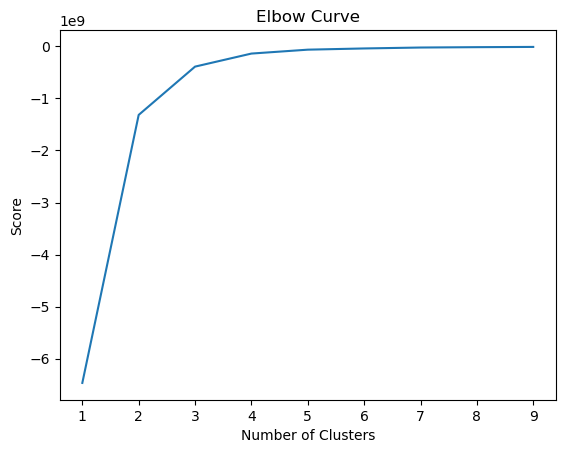

In [14]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

we´ll use three clusters as supposed by the diagram

### d) running k-means algorithm

In [15]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3)

...left out the part of "n_jobs" due to caused error and researches that results it is not neccessary to be included

In [16]:
# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=3)

In [17]:
# attach new column to df1, showing result of clusters
df1['clusters'] = kmeans.fit_predict(df1)

In [18]:
df1.head()

,count_of_sources,mean_value,clusters
0,1714,2664.312569,0
1,2522,5089.664728,0
2,2748,1278.388002,0
3,2748,1600.721058,0
4,1788,10999.550380,2


In [19]:
df1['clusters'].value_counts()

0    39
2     7
1     1
Name: clusters, dtype: int64

In [20]:
df1.to_excel(os.path.join(path, '02 Prepared Data', 'clusters.xlsx'))

### f) Visualizations

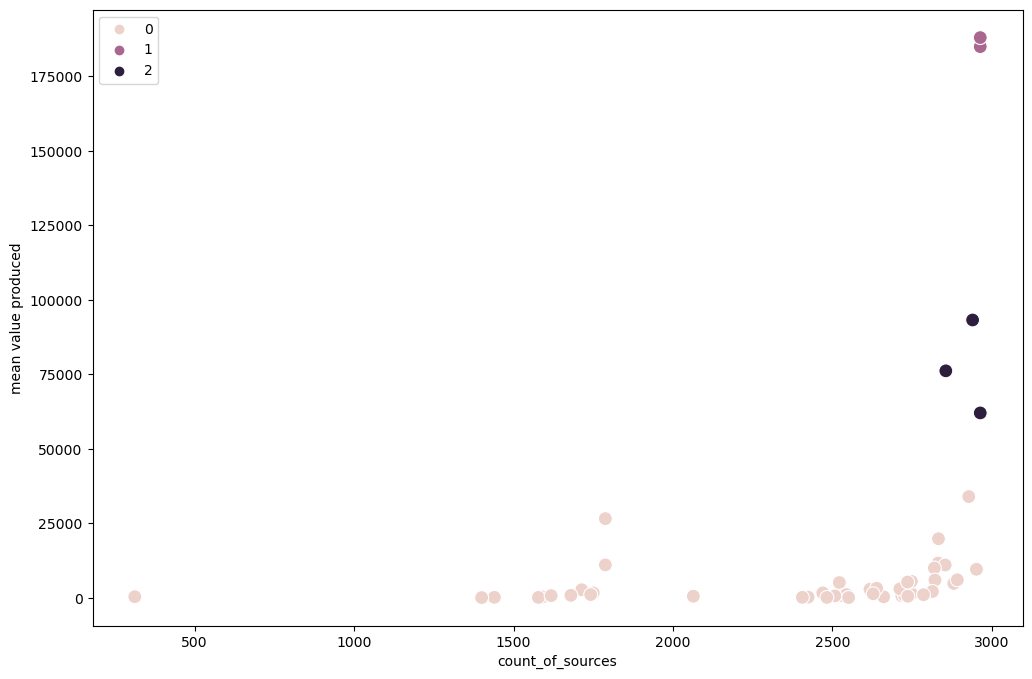

In [41]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['count_of_sources'], y=df1['mean_value'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('count_of_sources') # Label x-axis.
plt.ylabel('mean value produced') # Label y-axis.
plt.show()

The clusters are making sence in the way we expected the relation to behave; the more sources of energy a country does operate, the more energy it will produce itself. 

### g) descriptive statistics

In [42]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'

In [43]:
df1.groupby('cluster').agg({'count_of_sources':['mean', 'median'], 
                         'mean_value':['mean', 'median']})

count_of_sources             mean_value               
                        mean  median           mean         median
cluster                                                           
dark purple      2920.000000  2940.0   77109.158390   76127.327343
pink             2387.957447  2628.0    4253.893635    1349.807701
purple           2964.000000  2964.0  186440.725555  186440.725555

while the stats of counts of sources do not differ significantly, we can see that there are larger differences in the mean values. This leads us to further analysis of the reasons for higher values, for example back to the countries geographical position or the share in kinds of energy sources a country is operating.